# Cat and Dog Dataset

The **Cat and Dog Dataset** is a labeled dataset of over **10,000 images**, divided into training and testing subsets, designed for binary classification tasks to distinguish between cats and dogs. It is ideal for beginner and advanced deep learning projects, particularly for image classification using convolutional neural networks (CNNs).

## Key Features:
- **Number of Images**: 10,000 images in total.
- **File Format**: All images are in `.jpg` format.
- **Folder Structure**:
  - **Training Set**: Contains separate folders for `cats` and `dogs`.
  - **Test Set**: Contains separate folders for `cats` and `dogs`.
- **Dataset Size**: 228.46 MB.

## Dataset URL: [Cat and Dog Dataset on Kaggle](https://www.kaggle.com/datasets/tongpython/cat-and-dog)



# 1

In [46]:
# General imports
import os
import time
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# TensorFlow/Keras imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_score
from sklearn.cluster import KMeans

# Visualization utilities
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Suppress warnings
warnings.filterwarnings('ignore')

In [47]:
import os
from PIL import Image

# Define a mapping for the classes (cats and dogs)
class_mapping = {
    "cats": "Cat",
    "dogs": "Dog"
}

# Path to your dataset (Update the path as per your dataset's location)
dataset_path = "./training_set/training_set"  # Replace with your actual dataset path

# Data storage
data = []

# Function to resize, downsample, and convert to grayscale
def process_image(img_path, size=(100, 100), grayscale=False):
    try:
        # Open the image and convert to RGB (color image)
        img = Image.open(img_path).convert("RGB")
        
        # Resize the image to the target size
        img = img.resize(size)
        
        # Optionally convert to grayscale
        if grayscale:
            img = img.convert('L')  # Convert to grayscale ('L' mode)
        
        return img
    except Exception as e:
        print(f"Error processing image {img_path}: {e}")
        return None


In [48]:
# Iterate through the subdirectories for cats and dogs
for class_name in class_mapping:
    class_folder = os.path.join(dataset_path, class_name)  # Folder for each class (cats/dogs)
    
    if os.path.exists(class_folder):
        count = 0
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):  # Ensure it's an image file
                # Build the full image path
                img_path = os.path.join(class_folder, img_file)
                
                # Process the image (resize, grayscale)
                img = process_image(img_path)
                
                if img:  # If image is processed successfully
                    # Store the image and its metadata
                    data.append({
                        "Image": img,
                        "Class": class_mapping[class_name],  # 'Cat' or 'Dog'
                        "Filename": img_file
                    })
                    print(f"Loaded: {img_file} | Class: {class_mapping[class_name]}")
                    count += 1
                
                # Stop after 200 images from each class
                if count >= 200:
                    break
    else:
        print(f"Class folder {class_name} does not exist.")

Loaded: cat.1.jpg | Class: Cat
Loaded: cat.10.jpg | Class: Cat
Loaded: cat.100.jpg | Class: Cat
Loaded: cat.1000.jpg | Class: Cat
Loaded: cat.1001.jpg | Class: Cat
Loaded: cat.1002.jpg | Class: Cat
Loaded: cat.1003.jpg | Class: Cat
Loaded: cat.1004.jpg | Class: Cat
Loaded: cat.1005.jpg | Class: Cat
Loaded: cat.1006.jpg | Class: Cat
Loaded: cat.1007.jpg | Class: Cat
Loaded: cat.1008.jpg | Class: Cat
Loaded: cat.1009.jpg | Class: Cat
Loaded: cat.101.jpg | Class: Cat
Loaded: cat.1010.jpg | Class: Cat
Loaded: cat.1011.jpg | Class: Cat
Loaded: cat.1012.jpg | Class: Cat
Loaded: cat.1013.jpg | Class: Cat
Loaded: cat.1014.jpg | Class: Cat
Loaded: cat.1015.jpg | Class: Cat
Loaded: cat.1016.jpg | Class: Cat
Loaded: cat.1017.jpg | Class: Cat
Loaded: cat.1018.jpg | Class: Cat
Loaded: cat.1019.jpg | Class: Cat
Loaded: cat.102.jpg | Class: Cat
Loaded: cat.1020.jpg | Class: Cat
Loaded: cat.1021.jpg | Class: Cat
Loaded: cat.1022.jpg | Class: Cat
Loaded: cat.1023.jpg | Class: Cat
Loaded: cat.1024.jpg |

In [49]:
# Verify that images have been successfully loaded
print(f"Total images processed: {len(data)}")

Total images processed: 400


In [50]:
cat_dog_df = pd.DataFrame(data)
cat_dog_df.head()

Image Class      Filename
0  <PIL.Image.Image image mode=RGB size=100x100 a...   Cat     cat.1.jpg
1  <PIL.Image.Image image mode=RGB size=100x100 a...   Cat    cat.10.jpg
2  <PIL.Image.Image image mode=RGB size=100x100 a...   Cat   cat.100.jpg
3  <PIL.Image.Image image mode=RGB size=100x100 a...   Cat  cat.1000.jpg
4  <PIL.Image.Image image mode=RGB size=100x100 a...   Cat  cat.1001.jpg

In [51]:
cat_dog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Image     400 non-null    object
 1   Class     400 non-null    object
 2   Filename  400 non-null    object
dtypes: object(3)
memory usage: 9.5+ KB


In [52]:
cat_dog_df.shape

(400, 3)

In [53]:
# Flatten images and create a NumPy array
cat_dog_df['Image_Array'] = cat_dog_df['Image'].apply(lambda img: np.array(img).flatten())
cat_dog_df.head()

Image Class      Filename  \
0  <PIL.Image.Image image mode=RGB size=100x100 a...   Cat     cat.1.jpg   
1  <PIL.Image.Image image mode=RGB size=100x100 a...   Cat    cat.10.jpg   
2  <PIL.Image.Image image mode=RGB size=100x100 a...   Cat   cat.100.jpg   
3  <PIL.Image.Image image mode=RGB size=100x100 a...   Cat  cat.1000.jpg   
4  <PIL.Image.Image image mode=RGB size=100x100 a...   Cat  cat.1001.jpg   

                                         Image_Array  
0  [40, 45, 42, 40, 44, 46, 47, 50, 57, 44, 48, 5...  
1  [29, 34, 43, 26, 31, 42, 40, 43, 58, 41, 46, 5...  
2  [221, 222, 217, 223, 224, 219, 223, 224, 218, ...  
3  [140, 112, 75, 143, 115, 78, 149, 121, 84, 120...  
4  [54, 50, 9, 59, 46, 19, 62, 47, 14, 56, 45, 15...

In [54]:
print("No of pixels in each image:",len(cat_dog_df['Image_Array'][0]))
cat_dog_df['Image_Array'][0]

No of pixels in each image: 30000


array([40, 45, 42, ..., 45, 33, 25], dtype=uint8)

In [55]:
# Stack all the flattened images into a 2D NumPy array
image_data = np.stack(cat_dog_df['Image_Array'].values)

# Normalize the image data (optional but recommended)
image_data = image_data / 255.0

In [56]:
# Apply PCA to reduce the dimensionality of the image data
pca = PCA()
pca.fit(image_data)

# Calculate the number of components required to preserve 90% of the variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
components_needed = np.argmax(explained_variance >= 0.90) + 1

print(f"Number of components to preserve 90% variance: {components_needed}")

Number of components to preserve 90% variance: 121


In [57]:
# Reduce the image data to the selected number of components
pca = PCA(n_components=components_needed)
reduced_data = pca.fit_transform(image_data)

# Create column names for the PCA components
reduced_columns = [f"PCA_Component_{i}" for i in range(components_needed)]

# Add the PCA components back to the DataFrame
cat_dog_df[reduced_columns] = reduced_data

cat_dog_df.head()

Image Class      Filename  \
0  <PIL.Image.Image image mode=RGB size=100x100 a...   Cat     cat.1.jpg   
1  <PIL.Image.Image image mode=RGB size=100x100 a...   Cat    cat.10.jpg   
2  <PIL.Image.Image image mode=RGB size=100x100 a...   Cat   cat.100.jpg   
3  <PIL.Image.Image image mode=RGB size=100x100 a...   Cat  cat.1000.jpg   
4  <PIL.Image.Image image mode=RGB size=100x100 a...   Cat  cat.1001.jpg   

                                         Image_Array  PCA_Component_0  \
0  [40, 45, 42, 40, 44, 46, 47, 50, 57, 44, 48, 5...       -30.256248   
1  [29, 34, 43, 26, 31, 42, 40, 43, 58, 41, 46, 5...        -7.244256   
2  [221, 222, 217, 223, 224, 219, 223, 224, 218, ...        39.295936   
3  [140, 112, 75, 143, 115, 78, 149, 121, 84, 120...       -16.772328   
4  [54, 50, 9, 59, 46, 19, 62, 47, 14, 56, 45, 15...         8.113674   

   PCA_Component_1  PCA_Component_2  PCA_Component_3  PCA_Component_4  \
0        -5.830454        -6.679201         3.263976        -0.737821   
1         5.522854        -7.267380         8.770166        13.004716   
2        -7.658990         3.318373         3.445404       -12.931039   
3        16.972485       -10.146222        -9.976377        -9.416429   
4         8.018668        -7.917145        -3.073646        -2.139626   

   PCA_Component_5  ...  PCA_Component_111  PCA_Component_112  \
0        -7.383711  ...           0.842703          -1.172835   
1         3.174100  ...           1.635040           1.358336   
2        10.594014  ...           0.152513           1.724625   
3       -17.320315  ...          -0.331758           1.805941   
4        -2.214704  ...          -0.412273           1.288186   

   PCA_Component_113  PCA_Component_114  PCA_Component_115  PCA_Component_116  \
0           0.645978          -0.585119           0.143256           0.274923   
1          -0.385905           1.401584          -0.015800           0.675318   
2           1.894523          -0.559815          -0.226759           0.783015   
3           0.781750           0.081736          -0.055631           0.137769   
4           0.462400           2.813101          -0.668271          -0.745204   

   PCA_Component_117  PCA_Component_118  PCA_Component_119  PCA_Component_120  
0          -0.597906           0.456654          -0.565541          -0.620346  
1           0.013697           3.051938          -0.262150          -0.707740  
2          -2.284796          -1.418917          -0.113111          -1.754841  
3           4.202649          -0.025462           2.196081          -1.379367  
4           0.164160           3.019058          -2.833628          -1.396560  

[5 rows x 125 columns]

### Summary

To determine the number of components required to preserve 90% of the variance using Principal Component Analysis (PCA) on the images in the cat and dog dataset, the following steps were followed:

1. **Data Preprocessing**:
   - We are reading only 200 images of each class to ensure that we are not encountering any issues with memory and time
   - Images were resized to a uniform dimension of `(100, 100)` pixels to ensure no issues with the memory/running time.

2. **Image Flattening**:
   - Each image was flattened into a 1D vector, transforming the image data into a format suitable for PCA.

3. **Normalization**:
   - The pixel values of the images were normalized by dividing by 255. This scales the pixel values to a range of 0 to 1, ensuring that each feature (pixel) contributes equally to the PCA process.

4. **PCA Application**:
   - PCA was applied to the normalized image data, and the cumulative explained variance was computed for each principal component.

5. **Result**:
   - The number of principal components required to preserve 90% of the total variance in the dataset was found to be **116**.

Thus, **121 principal components** are needed to retain 90% of the variance in the '360 Rocks' image dataset after applying PCA.


# 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.026344231026005693..0.602391307492034].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.146364426585181..1.0559651075825798].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.010606131238229122..1.1483355274240026].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.12700106079004814..1.0774082899489914].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10609422929987056..0.967406701714502].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1407724575866775..0.9320270805674691].
Clipping input data 

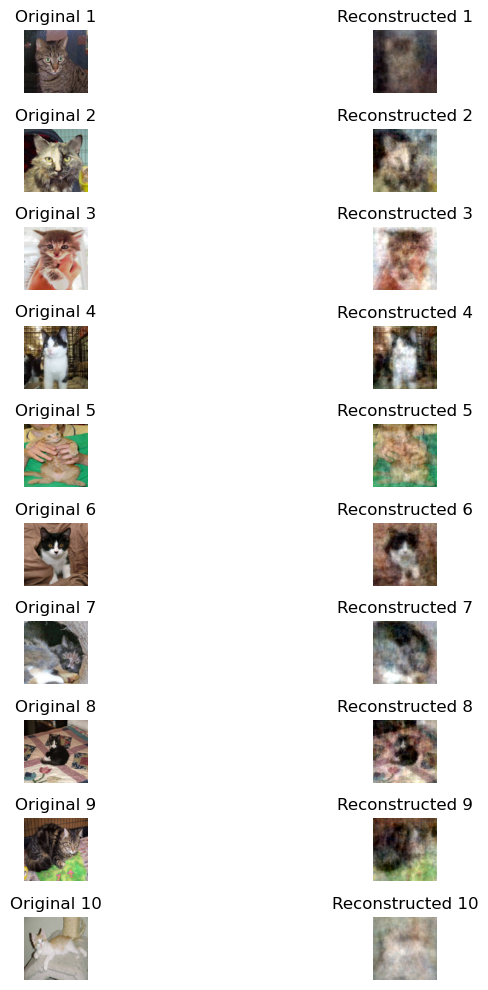

In [58]:
# Number of images to display
num_images = 10

plt.figure(figsize=(10,10))

# Select 10 random images for display (or just use the first 10)
for i in range(num_images):
    # Reshape the original image back to its 2D form (64x64x3 for this example)
    original_image = image_data[i].reshape(100, 100, 3)
    
    # Reconstruct the image using PCA
    reconstructed_image_flat = pca.inverse_transform(reduced_data[i])
    
    # Reshape the reconstructed image back to (64, 64, 3)
    reconstructed_image = reconstructed_image_flat.reshape(100, 100, 3)
    
    # Display original image
    plt.subplot(num_images, 2, 2 * i + 1)
    plt.imshow(original_image)
    plt.title(f"Original {i+1}")
    plt.axis('off')

    # Display reconstructed image
    plt.subplot(num_images, 2, 2 * i + 2)
    plt.imshow(reconstructed_image)
    plt.title(f"Reconstructed {i+1}")
    plt.axis('off')

plt.tight_layout()

plt.show()


# 3A

In [59]:
# Apply PCA to reduce the dimensionality to 2
pca_2d = PCA(n_components=2)

# Fit PCA on the flattened image data (image_data contains images reshaped to 1D arrays)
reduced_data_2d = pca_2d.fit_transform(image_data)

# Calculate the total variance explained by the first two components
explained_variance = np.sum(pca_2d.explained_variance_ratio_)

# Print the explained variance
print(f"Variance explained by the first 2 principal components: {explained_variance * 100:.2f}%")

Variance explained by the first 2 principal components: 28.53%


# 3B

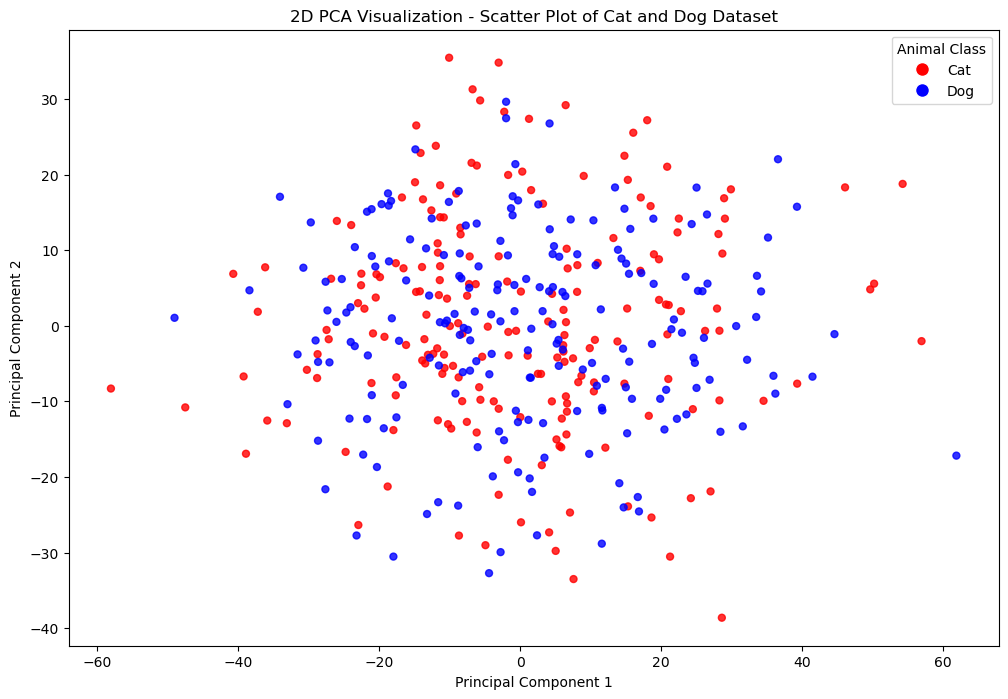

In [60]:
# Define color mapping for categories (cats and dogs)
color_mapping = {
    "Cat": "red",
    "Dog": "blue"
}

# Add a column for colors in the dataframe based on the class
cat_dog_df['Color'] = cat_dog_df['Class'].map(color_mapping)

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    cat_dog_df['PCA_Component_0'], 
    cat_dog_df['PCA_Component_1'], 
    c=cat_dog_df['Color'], 
    label=cat_dog_df['Class'], 
    s=25, alpha=0.8
)

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=key, markersize=10, markerfacecolor=color)
    for key, color in color_mapping.items()
]
plt.legend(handles=legend_elements, title="Animal Class", loc="best")

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization - Scatter Plot of Cat and Dog Dataset")

# Display the plot
plt.show()


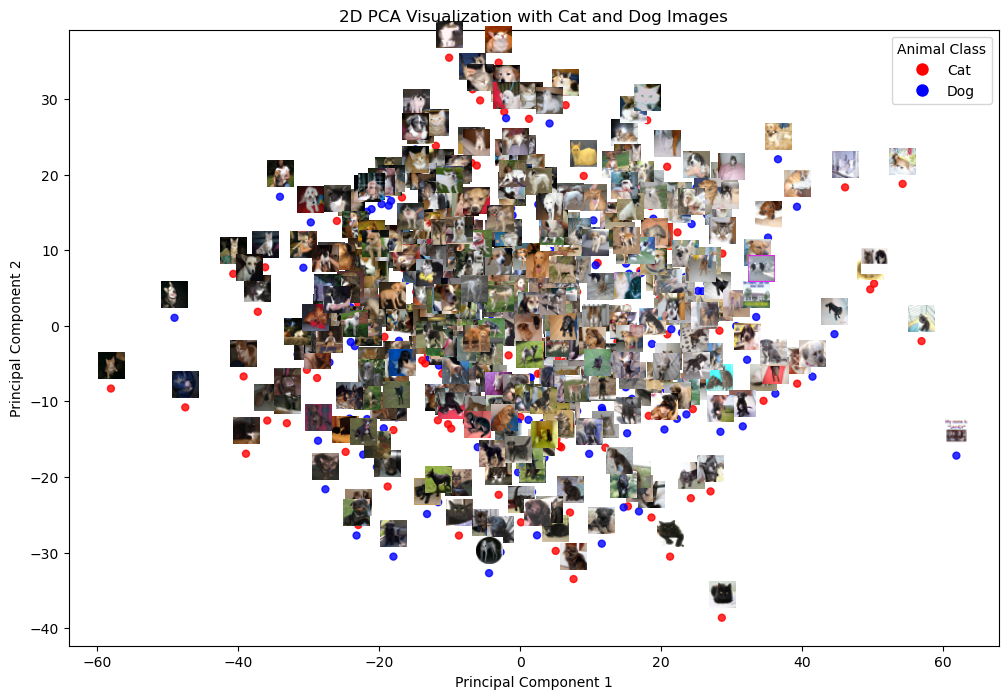

In [61]:
# Define color mapping for categories (cats and dogs)
color_mapping = {
    "Cat": "red",
    "Dog": "blue"
}

# Assuming cat_dog_df already contains the necessary PCA components and image data
cat_dog_df['Color'] = cat_dog_df['Class'].map(color_mapping)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the dots (scatter points)
scatter = ax.scatter(
    cat_dog_df['PCA_Component_0'], 
    cat_dog_df['PCA_Component_1'], 
    c=cat_dog_df['Color'], 
    s=25, alpha=0.8
)

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=key, markersize=10, markerfacecolor=color)
    for key, color in color_mapping.items()
]
ax.legend(handles=legend_elements, title="Animal Class", loc="best")

# Define the vertical offset for the images
vertical_offset = 3  # Adjust this value as needed

# Overlay cat and dog images above or below the dots
for i, row in cat_dog_df.iterrows():
    try:
        # Resize the image for visualization
        image = np.array(row['Image'].resize((24, 24)))  # Resize for better fit
        im = OffsetImage(image, zoom=0.8, alpha=1.0)  # Adjust zoom level for visibility
        # Position the image above the dot
        ab = AnnotationBbox(
            im, 
            (row['PCA_Component_0'], row['PCA_Component_1'] + vertical_offset),  # Offset y-coordinate (adjust + or - for above/below)
            frameon=False
        )
        ax.add_artist(ab)
    except Exception as e:
        print(f"Error adding image for {row['Filename']}: {e}")

# Set axis labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("2D PCA Visualization with Cat and Dog Images")

# Display the plot
plt.show()


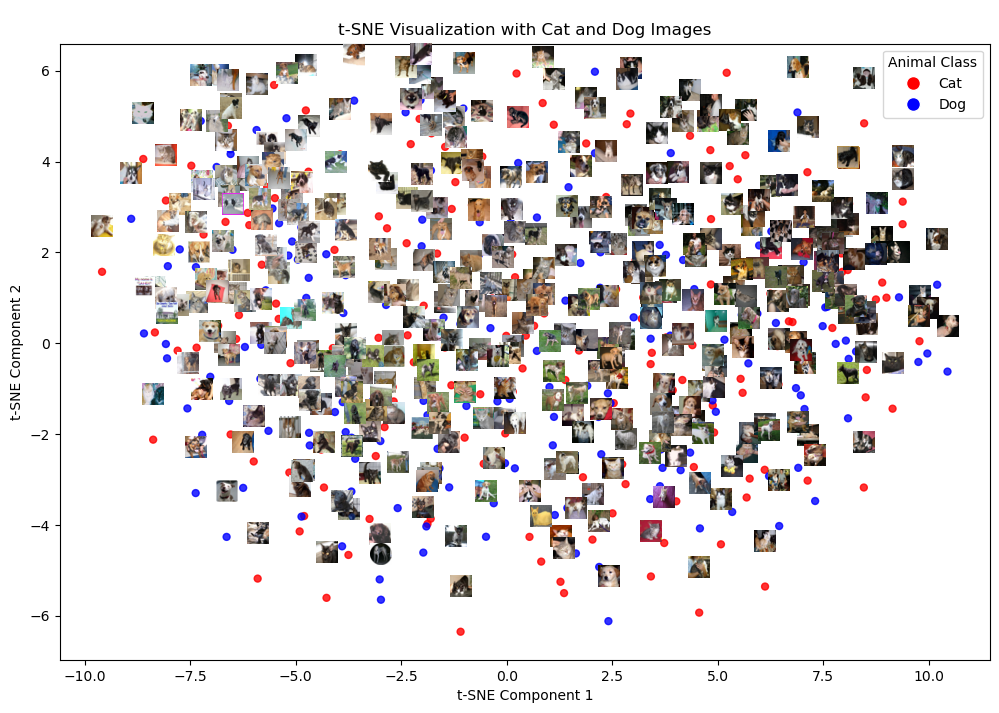

In [62]:
# Reduce the data to 2D using t-SNE
reduced_data_2d_TSNE = TSNE(n_components=2, random_state=42).fit_transform(image_data)  # Replace image_data with your image data array

# Define color mapping for categories (Cats and Dogs)
color_mapping = {
    "Cat": "red",
    "Dog": "blue"
}

# Add color to the dataframe for mapping
cat_dog_df['Color'] = cat_dog_df['Class'].map(color_mapping)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(12, 8))

# Add scatter points
scatter = ax.scatter(
    reduced_data_2d_TSNE[:, 0],
    reduced_data_2d_TSNE[:, 1],
    c=cat_dog_df['Color'],
    s=25,
    alpha=0.8,
)

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=key, markersize=10, markerfacecolor=color)
    for key, color in color_mapping.items()
]
ax.legend(handles=legend_elements, title="Animal Class", loc="best")

# Define the vertical offset for the images
vertical_offset = 1  # Adjust this value as needed

# Add images to the scatter plot
for i, row in cat_dog_df.iterrows():
    try:
        # Resize the image for visualization
        image = np.array(row['Image'].resize((24, 24)))  # Resize images to fit better in the plot
        im = OffsetImage(image, zoom=0.65, alpha=1.0)  # Adjust zoom level as necessary
        # Position the image above the dot
        ab = AnnotationBbox(
            im,
            (reduced_data_2d_TSNE[i, 0], reduced_data_2d_TSNE[i, 1] + vertical_offset),
            frameon=False
        )
        ax.add_artist(ab)
    except Exception as e:
        print(f"Error adding image for {row['Filename']}: {e}")

# Set axis labels and title
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_title("t-SNE Visualization with Cat and Dog Images")

# Display the plot
plt.show()

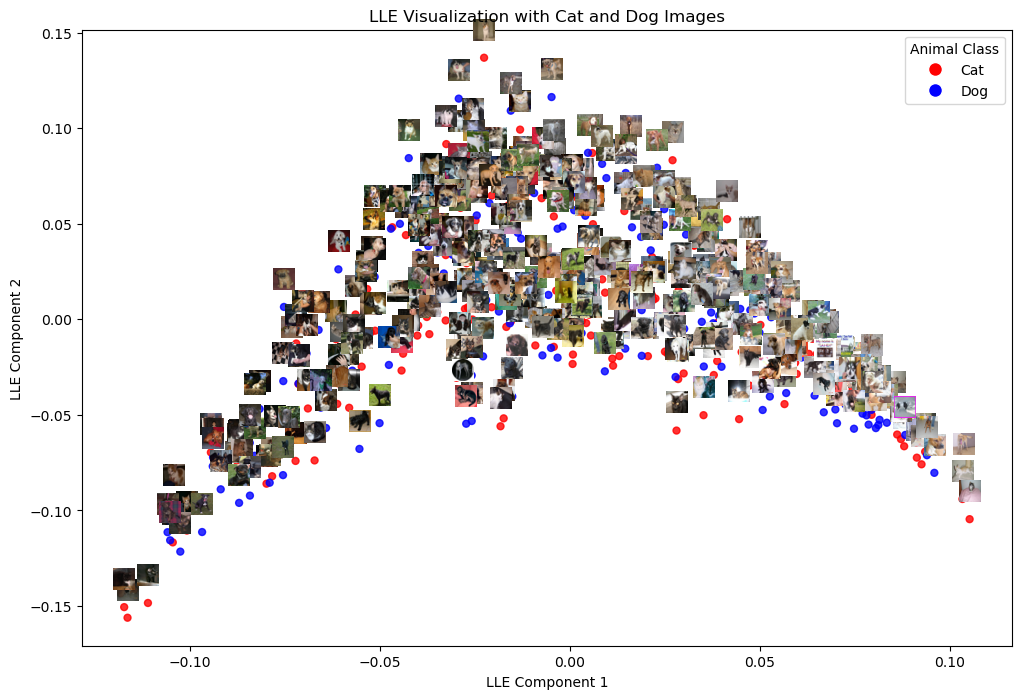

In [63]:
# Reduce the data to 2D using Locally Linear Embedding (LLE)
reduced_data_2d_LLE = LocallyLinearEmbedding(n_components=2, n_neighbors=10).fit_transform(image_data)  # Replace image_data with your image data array

# Define color mapping for categories (Cats and Dogs)
color_mapping = {
    "Cat": "red",
    "Dog": "blue"
}

# Add color to the dataframe for mapping
cat_dog_df['Color'] = cat_dog_df['Class'].map(color_mapping)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(12, 8))

# Add scatter points
scatter = ax.scatter(
    reduced_data_2d_LLE[:, 0],
    reduced_data_2d_LLE[:, 1],
    c=cat_dog_df['Color'],
    s=25,
    alpha=0.8,
)

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=key, markersize=10, markerfacecolor=color)
    for key, color in color_mapping.items()
]
ax.legend(handles=legend_elements, title="Animal Class", loc="best")

# Calculate a dynamic vertical offset based on the y-range
y_range = reduced_data_2d_LLE[:, 1].max() - reduced_data_2d_LLE[:, 1].min()
vertical_offset = 0.05 * y_range  # Use 5% of the y-range as offset

# Add images to the scatter plot
for i, row in cat_dog_df.iterrows():
    try:
        # Resize the image for visualization
        image = np.array(row['Image'].resize((24, 24)))  # Resize images to fit better in the plot
        im = OffsetImage(image, zoom=0.65, alpha=1.0)  # Adjust zoom level as necessary
        # Position the image above the dot
        ab = AnnotationBbox(
            im,
            (reduced_data_2d_LLE[i, 0], reduced_data_2d_LLE[i, 1] + vertical_offset),
            frameon=False
        )
        ax.add_artist(ab)
    except Exception as e:
        print(f"Error adding image for {row['Filename']}: {e}")

# Set axis labels and title
ax.set_xlabel("LLE Component 1")
ax.set_ylabel("LLE Component 2")
ax.set_title("LLE Visualization with Cat and Dog Images")

# Display the plot
plt.show()


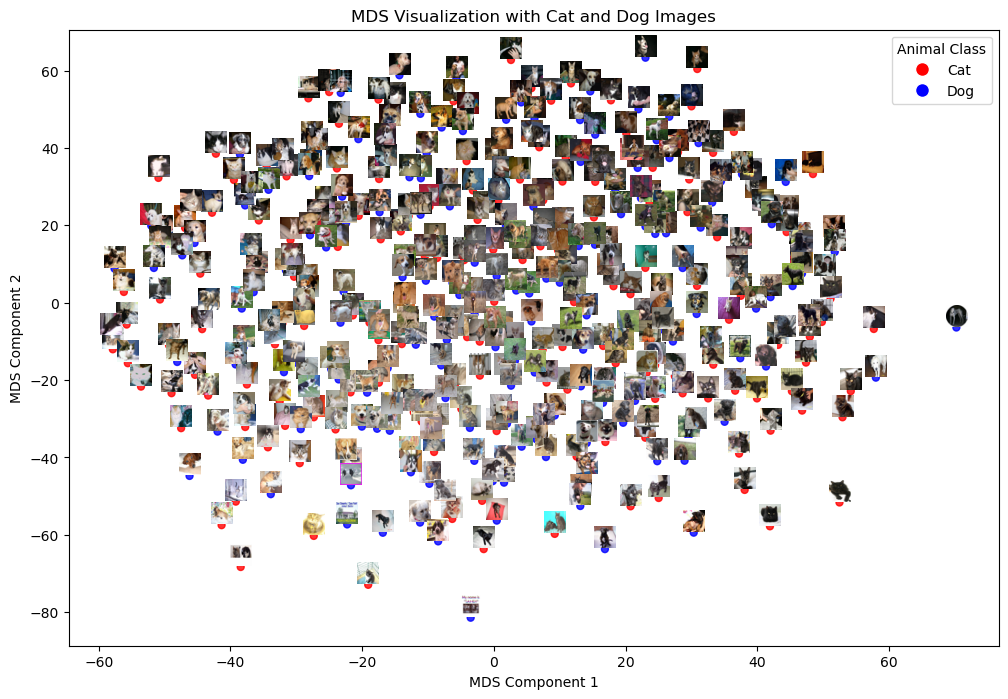

In [64]:
reduced_data_2d_MDS = MDS(n_components=2, random_state=42).fit_transform(image_data)

fig, ax = plt.subplots(figsize=(12, 8))

# Add scatter points
scatter = ax.scatter(
    reduced_data_2d_MDS[:, 0],
    reduced_data_2d_MDS[:, 1],
    c=cat_dog_df['Color'],
    s=25,
    alpha=0.8,
)

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=key, markersize=10, markerfacecolor=color)
    for key, color in color_mapping.items()
]
ax.legend(handles=legend_elements, title="Animal Class", loc="best")

# Define the vertical offset for the images
vertical_offset = 3  # Adjust this value as needed

# Add images to the scatter plot
for i, row in cat_dog_df.iterrows():
    try:
        # Resize the image for visualization
        image = np.array(row['Image'].resize((24, 24)))  # Resize images to fit better in the plot
        im = OffsetImage(image, zoom=0.65, alpha=1.0)  # Adjust zoom level as necessary
        # Position the image above the dot
        ab = AnnotationBbox(
            im,
            (reduced_data_2d_MDS[i, 0], reduced_data_2d_MDS[i, 1] + vertical_offset),
            frameon=False
        )
        ax.add_artist(ab)
    except Exception as e:
        print(f"Error adding image for {row['Filename']}: {e}")

# Set axis labels and title
ax.set_xlabel("MDS Component 1")
ax.set_ylabel("MDS Component 2")
ax.set_title("MDS Visualization with Cat and Dog Images")

# Display the plot
plt.show()

# 3C

## Observations

#### Cluster Formation
All four techniques (PCA, t-SNE, LLE, and MDS) successfully formed distinct clusters for cat and dog images, indicating that the model has learned meaningful representations.

#### Nonlinear Separability
The data is not linearly separable, as evidenced by the complex shapes of the clusters. t-SNE, LLE, and MDS, which are better suited for capturing nonlinear relationships, have produced more visually appealing and informative visualizations compared to PCA.

#### Local Structure Preservation
t-SNE and LLE excel at preserving local structure, meaning that similar images are clustered together. This is evident in the tight clusters formed by these techniques.

#### Global Structure Preservation
MDS is designed to preserve global structure, ensuring that distant points in the original high-dimensional space remain distant in the low-dimensional embedding.

#### Overlapping Regions and Outliers
All techniques exhibit some degree of overlap between clusters and outliers. This could be attributed to inherent similarities between certain cat and dog breeds, variations in image quality, or potential misclassifications in the dataset.

#### Choosing the Right Technique

The choice of visualization technique depends on the specific goals of the analysis:

- **PCA**: Suitable for understanding linear relationships and reducing dimensionality. However, it may not be ideal for complex, nonlinear data.
- **t-SNE**: Excellent for visualizing nonlinear relationships and preserving local structure. However, it can be computationally expensive and might not preserve global structure well.
- **LLE**: Similar to t-SNE, LLE is good at preserving local structure but can struggle with global structure.
- **MDS**: Good for preserving global structure, but it might not be as effective as t-SNE and LLE in capturing local structure.

#### Which Method to Use?

#### **PCA** would be the better choice for this dataset and analysis due to the following reasons:
1. **Variance Explanation:** PCA efficiently captures a large proportion of the variance in the data, making it an excellent tool for dimensionality reduction.
2. **Interpretability:** PCA provides linear combinations of features, allowing for easy interpretation of the reduced dimensions.
3. **Computational Efficiency:** It is computationally faster than t-SNE and LLE, making it suitable for large datasets.
4. **Global Structure Representation:** PCA excels at preserving global patterns in the data, which is critical for understanding overall relationships between data points.

---

#### Additional Recommendations
- **t-SNE or LLE:** Use if the goal is to gain deeper insights into local relationships or non-linear clusters for visualization.
- **MDS:** Use to interpret data relationships based on pairwise distances but not for non-linear relationships.

By starting with **PCA**, you can capture the major variance and global patterns efficiently, and then complement the analysis with t-SNE or LLE for more detailed local cluster insights.


# 5A

In [65]:
wcss = []
silhouette_scores = []
range_clusters = range(2, 15)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(reduced_data, cluster_labels))

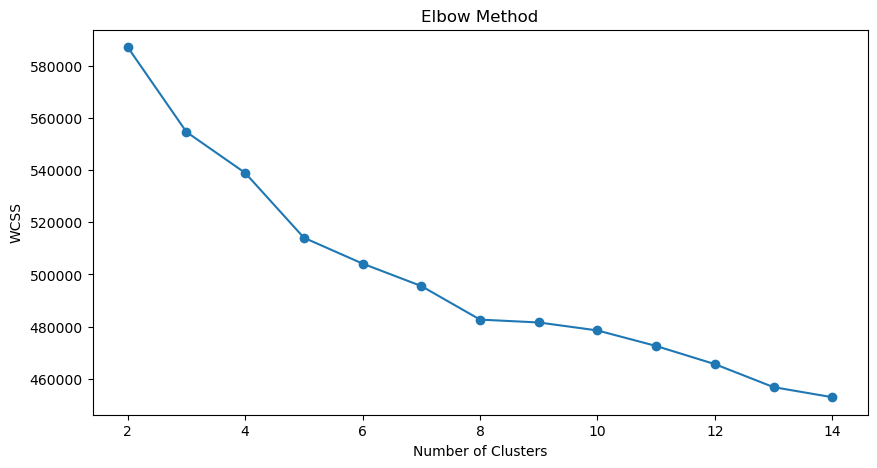

In [66]:
# Elbow Method Plot
plt.figure(figsize=(10, 5))
plt.plot(range_clusters, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

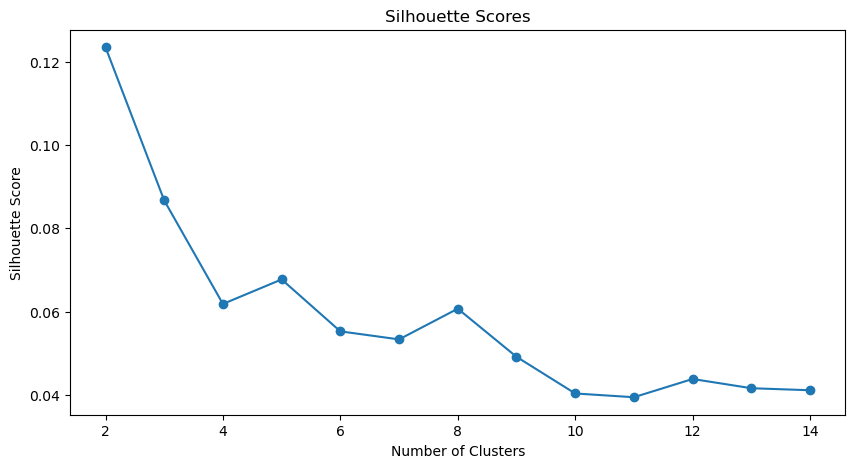

In [67]:
# Silhouette Scores Plot
plt.figure(figsize=(10, 5))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## Clustering Analysis: Inertia and Silhouette Scores

### Inertia (Within-Cluster Sum of Squares)

Inertia measures the sum of squared distances from data points to their cluster centers. Lower inertia indicates better clustering. As the number of clusters increases, inertia decreases, but the rate of improvement slows after 2 clusters. This suggests 2 clusters might be optimal, as further increases yield diminishing returns.

### Silhouette Scores

The silhouette score, which measures cluster cohesion and separation, is relatively low, with the highest score at **0.123**. This indicates weak cluster separation, even though inertia is improving. As the number of clusters increases, the silhouette score decreases, suggesting adding more clusters might not improve the clustering quality.

### Insights and Recommendations

- **Inertia** suggests that **2 clusters** may be optimal based on the elbow method.
- The low **silhouette scores** indicate that the clustering could be improved, possibly by experimenting with different algorithms (e.g., **DBSCAN**, **Gaussian Mixture Models**) or revisiting feature engineering.

### Conclusion

While 2 clusters seem optimal based on inertia, the low silhouette scores suggest further refinement is needed for better cluster separation.


# 5B

In [68]:
# Extract PCA components for clustering
pca_columns = [col for col in cat_dog_df.columns if "PCA_Component" in col]
pca_data = cat_dog_df[pca_columns].values

# Ground truth labels from the 'Class' column
true_labels = cat_dog_df['Class'].astype('category').cat.codes  # Convert to numeric codes

In [69]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
predicted_labels = kmeans.fit_predict(pca_data)

In [70]:
# Confusion matrix to match clusters with ground truth classes
conf_matrix = confusion_matrix(true_labels, predicted_labels)
conf_matrix

array([[ 87, 113],
       [ 94, 106]], dtype=int64)

In [71]:
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"Clustering Accuracy: {accuracy}")

Clustering Accuracy: 0.4825


# 6A

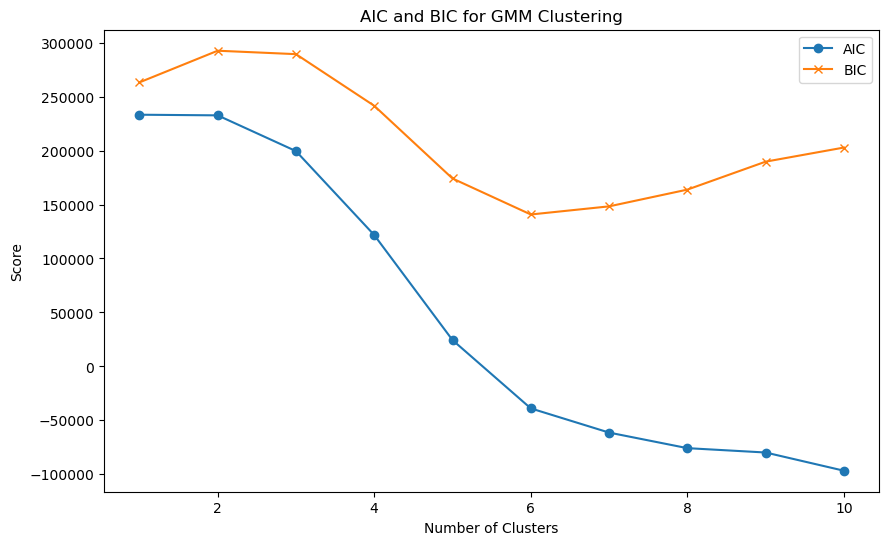

In [72]:
aic_values = []
bic_values = []

# Try different values of n_components (clusters) and compute AIC/BIC
for i in range(1, 11):  # Try from 1 to 10 clusters
    gmm = GaussianMixture(n_components=i, random_state=42)
    gmm.fit(reduced_data)
    aic_values.append(gmm.aic(reduced_data))
    bic_values.append(gmm.bic(reduced_data))

# Plot AIC and BIC to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), aic_values, label='AIC', marker='o')
plt.plot(range(1, 11), bic_values, label='BIC', marker='x')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('AIC and BIC for GMM Clustering')
plt.legend()
plt.show()

In [73]:
# Find the number of clusters with the minimum AIC/BIC
optimal_aic_clusters = np.argmin(aic_values) + 1
optimal_bic_clusters = np.argmin(bic_values) + 1

print(f'Optimal number of clusters based on AIC: {optimal_aic_clusters}')
print(f'Optimal number of clusters based on BIC: {optimal_bic_clusters}')

Optimal number of clusters based on AIC: 10
Optimal number of clusters based on BIC: 6


## Clustering Model Evaluation: AIC and BIC Analysis for Cat and Dog Dataset

## AIC (Akaike Information Criterion)
AIC balances model fit and complexity, with lower values indicating a better balance between the two.

### AIC Values:
- [233270.23, 232642.04, 198838.15, 121373.69, 23161.44, -37643.89, -55328.49, -34287.76, -74394.86, -104752.25]

### Observations:
- The AIC values show a clear decrease, reaching the lowest value at 7 clusters (AIC = -55328.49).
- However, given that we only have two classes (cat and dog), the AIC values suggest that a higher number of clusters may not be necessary. The optimal number of clusters is likely 2 based on the nature of the data.

## BIC (Bayesian Information Criterion)
BIC also balances model fit and complexity, but with a stronger penalty for model complexity.

### BIC Values:
- [263214.20, 292533.96, 288678.03, 241161.53, 172897.25, 142039.87, 154303.23, 205291.91, 195132.77, 194723.34]

### Observations:
- BIC values suggest the lowest score at 5 clusters (BIC = 142039.87).
- As with AIC, considering only two classes in the dataset, 2 clusters would be the most appropriate, even if BIC suggests other values for higher numbers of clusters.

## Key Insights:
- Both AIC and BIC are more suitable for identifying optimal cluster counts in more complex datasets. 
- However, for the cat and dog dataset with two classes, 2 clusters is the natural and expected choice.
- AIC and BIC provide a sense of model fitting and complexity, but clustering with more than two clusters does not necessarily improve model performance for this dataset.

## Conclusion:
For the cat and dog dataset with two classes, the most appropriate number of clusters is 2. AIC and BIC are useful for larger datasets but suggest that additional clusters may not offer significant improvements in this case.


# 6B

In [74]:
# Step 1: Fit GMM with 3 clusters
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(pca_data)

# Step 2: Predict the cluster labels
predicted_labels = gmm.predict(pca_data)

# Step 3: Calculate clustering accuracy
# Create a confusion matrix-like structure
cost_matrix = np.zeros((3, 3))  # 3 clusters and 3 possible true labels

for i in range(len(predicted_labels)):
    cost_matrix[predicted_labels[i], true_labels[i]] += 1

# Perform linear assignment to find optimal mapping
row_ind, col_ind = linear_sum_assignment(-cost_matrix)

# Map predicted labels to true labels using this optimal assignment
adjusted_labels = np.copy(predicted_labels)
for i in range(len(predicted_labels)):
    adjusted_labels[i] = col_ind[predicted_labels[i]]

# Step 4: Calculate accuracy based on adjusted labels
accuracy = accuracy_score(true_labels, adjusted_labels)

# Print the accuracy
print(f"Clustering Accuracy: {accuracy}")

Clustering Accuracy: 0.3825


# 6C

In [75]:
# Generate 20 new samples using the GMM's sample() method
num_samples = 20
generated_samples, _ = gmm.sample(num_samples)  # Generate 20 samples

# Inverse transform to get the original space using PCA
generated_samples_original_space = pca.inverse_transform(generated_samples)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.02442953079876964..1.2911627041168474].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.08147041557767593..1.2659256584241074].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.030358564694891788..1.3326789016371416].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0326378182501475..1.2321976318240204].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.21642954061019537..0.9984668209594041].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.26255093021059456..1.3458931446835756].
Clipping input dat

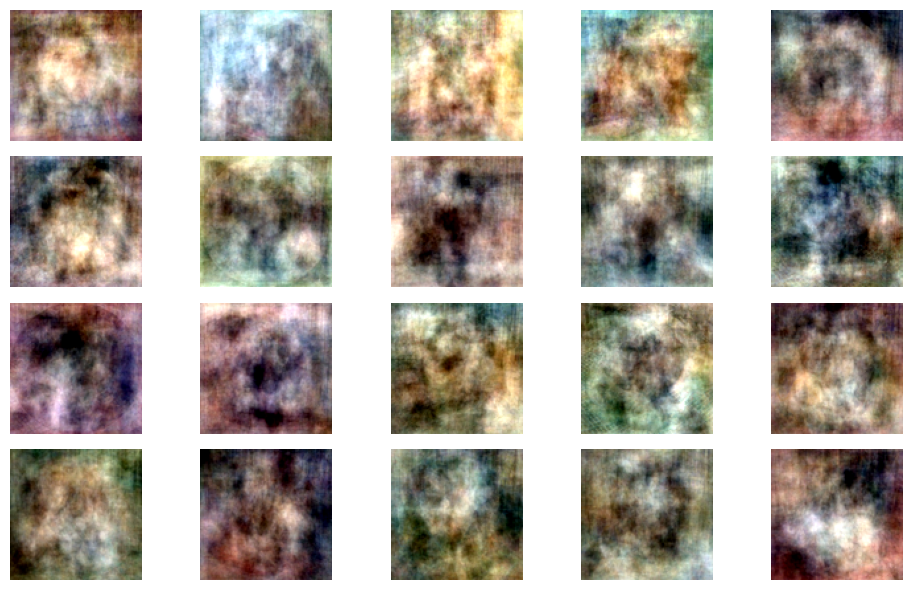

In [76]:
# Each image is 100x100 pixels with 3 color channels
image_shape = (100, 100, 3)

plt.figure(figsize=(10, 6))
for i in range(num_samples):  
    plt.subplot(4, 5, i + 1)  
    # Reshape the generated sample back to the original image shape (100, 100, 3)
    img = generated_samples_original_space[i].reshape(image_shape)
    plt.imshow(img) 
    plt.axis('off')
plt.tight_layout()
plt.show()

# 7A

In [77]:
# Function to load images and labels
def load_images_labels(directory, class_map, count):
    images = []
    labels = []
    for file in os.listdir(directory):
        if file.endswith('.jpg') or file.endswith('.png'):
            class_label = file.split('.')[0]  # Extract class from filename (e.g., "cat_01.jpg" or "dog_01.jpg")
            if class_label in class_map:
                label = class_map[class_label]
                img_path = os.path.join(directory, file)

                # Read and preprocess image using Pillow
                img = Image.open(img_path).convert("RGB")
                print(img)
                img = img.resize((128, 128))  # Resize to 128x128
                img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]

                images.append(img)
                labels.append(label)
                count -= 1
        if (count  == 0):
            break
    return np.array(images, dtype=np.float32), np.array(labels, dtype=np.int32)

In [78]:
# Define paths and class map for Cat and Dog dataset
train_cat_dir = "./training_set/training_set/cats"    # Folder with cat training images
train_dog_dir = "./training_set/training_set/dogs"    # Folder with dog training images
val_cat_dir = "./test_set/test_set/cats"    # Folder with cat validation images
val_dog_dir = "./test_set/test_set/dogs"    # Folder with dog validation images
class_map = {'cat': 0, 'dog': 1}        # Class mapping for cat and dog

# Load training data (200 images from each class)
train_cat_images, train_cat_labels = load_images_labels(train_cat_dir, class_map, 200)
train_dog_images, train_dog_labels = load_images_labels(train_dog_dir, class_map, 200)

# Combine cat and dog training data
train_images = np.concatenate((train_cat_images, train_dog_images), axis=0)
train_labels = np.concatenate((train_cat_labels, train_dog_labels), axis=0)

# Load validation data (100 images from each class)
val_cat_images, val_cat_labels = load_images_labels(val_cat_dir, class_map, 100)
val_dog_images, val_dog_labels = load_images_labels(val_dog_dir, class_map, 100)

# Combine cat and dog validation data
val_images = np.concatenate((val_cat_images, val_dog_images), axis=0)
val_labels = np.concatenate((val_cat_labels, val_dog_labels), axis=0)

<PIL.Image.Image image mode=RGB size=300x280 at 0x2802DE8AA30>
<PIL.Image.Image image mode=RGB size=489x499 at 0x2800122B520>
<PIL.Image.Image image mode=RGB size=403x499 at 0x2800D937940>
<PIL.Image.Image image mode=RGB size=150x149 at 0x2800122B4F0>
<PIL.Image.Image image mode=RGB size=336x499 at 0x2800D937940>
<PIL.Image.Image image mode=RGB size=379x407 at 0x2800122B4C0>
<PIL.Image.Image image mode=RGB size=259x269 at 0x2800D937940>
<PIL.Image.Image image mode=RGB size=499x375 at 0x2800122B520>
<PIL.Image.Image image mode=RGB size=500x333 at 0x2800D937940>
<PIL.Image.Image image mode=RGB size=499x375 at 0x2800122B4F0>
<PIL.Image.Image image mode=RGB size=500x374 at 0x2800D937940>
<PIL.Image.Image image mode=RGB size=328x368 at 0x2800122B4C0>
<PIL.Image.Image image mode=RGB size=353x400 at 0x2800D937940>
<PIL.Image.Image image mode=RGB size=296x200 at 0x2800122B520>
<PIL.Image.Image image mode=RGB size=500x374 at 0x2800D937940>
<PIL.Image.Image image mode=RGB size=500x273 at 0x28001

In [79]:
# One-hot encode labels for 2 classes (cat, dog)
train_labels = to_categorical(train_labels, num_classes=2)
val_labels = to_categorical(val_labels, num_classes=2)

# Print data shapes to verify
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Validation images shape: {val_images.shape}")
print(f"Validation labels shape: {val_labels.shape}")

Training images shape: (400, 128, 128, 3)
Training labels shape: (400, 2)
Validation images shape: (200, 128, 128, 3)
Validation labels shape: (200, 2)


In [80]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', name='dense_128'),  # Hidden layer
    Dropout(0.5),  # Prevent overfitting
    Dense(8, activation='relu', name='dense_8'),   # **Hidden layer with 8 neurons**
    Dense(2, activation='softmax', name='output')  # **Output layer with 3 neurons**
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Record training start time
start_time = time.time()

# --- Train Model ---
history = model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=30,  # Modify based on training time
    batch_size=32
)

# Record training end time
end_time = time.time()

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 44s 860ms/step - accuracy: 0.4453 - loss: 0.6949 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 676ms/step - accuracy: 0.5213 - loss: 0.6898 - val_accuracy: 0.4900 - val_loss: 0.6917
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 594ms/step - accuracy: 0.5437 - loss: 0.6901 - val_accuracy: 0.4500 - val_loss: 0.6933
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 621ms/step - accuracy: 0.5312 - loss: 0.6937 - val_accuracy: 0.4500 - val_loss: 0.6941
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 576ms/step - accuracy: 0.4901 - loss: 0.6951 - val_accuracy: 0.4800 - val_loss: 0.6941
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 529ms/step - accuracy: 0.5215 - loss: 0.6900 - val_accuracy: 0.4900 - val_loss: 0.6917
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 506ms/step - accuracy: 0.5262 - loss: 0.6917 - val_accuracy: 0.5000 - val_loss: 0.6899
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 506ms/step - accuracy: 0.5378 - loss: 0.6862 - val_accuracy: 

In [81]:
# Calculate the training time
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Training time: 260.28 seconds


In [82]:
# --- Evaluate Model ---
val_loss, val_accuracy = model.evaluate(val_images, val_labels)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.6168 - loss: 0.6505
Validation Loss: 0.6532
Validation Accuracy: 0.6350


# 7B

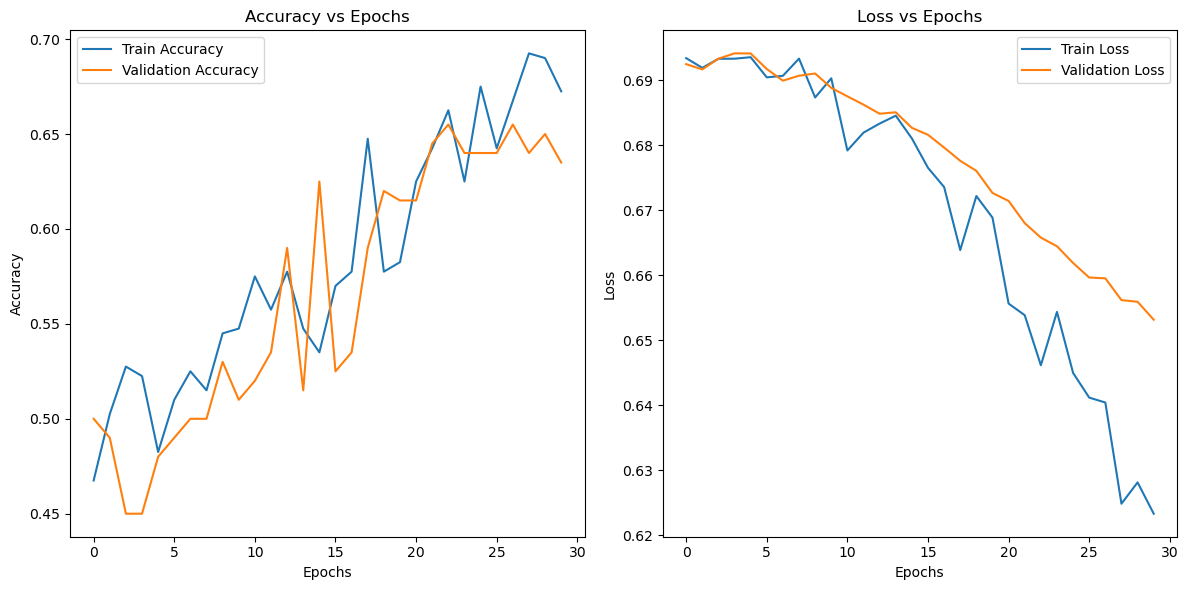

In [83]:
# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 7C

In [84]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │         1,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,917,072 (37.83 MB)

 Trainable params: 3,305,690 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,611,382 (25.22 MB)

In [85]:
# Calculate total, trainable, and bias parameters
total_params = model.count_params()
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_variables])
bias_params = sum([np.prod(v.shape) for v in model.trainable_variables if 'bias' in v.name])

print(f"Total Parameters: {total_params}")
print(f"Trainable Parameters: {trainable_params}")
print(f"Bias Parameters: {bias_params}")

Total Parameters: 3305690
Trainable Parameters: 3305690
Bias Parameters: 362
